In [1]:
#Julian Esteban Cordero Ramos
#Tarea 5

In [86]:
# Cargar las librerias necesarias

import pandas as pd #Manejo y analisis de estructuras de datos
import numpy as np #Calculo numerico y analisis de datos
import seaborn as sns #Creacion de graficos estadísticos
import matplotlib.pyplot as plt #Creacino de graficos en dos dimensiones

# Librerías para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para reg lineal
from sklearn.metrics import classification_report, confusion_matrix


In [87]:
#Lectura de datos en Python y lo cargamos en la variable Salud
Titanic= pd.read_csv('C:/Users/julia/Documents/UNAD/8. OCTAVO SEMESTRE/ANALISIS DE DATOS/Tarea 5/Titanic.CSV')

In [88]:
#Realizamos la lectura de los datos para el analisis exploratorio
Titanic.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [89]:
#descripción de los datos
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

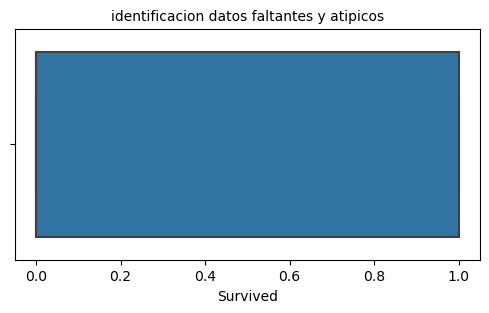

In [90]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Titanic['Survived']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos',fontsize=10)

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

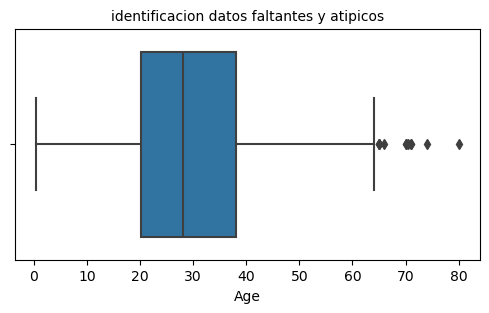

In [91]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=Titanic['Age']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos',fontsize=10)

In [92]:
#2 PROCESAR LOS DATOS LIMPIANDOLOS, TRATANDO VALORES FALTANTES Y TRANSFORMANDO SEGUN SEA NECESARIO

#Revision Datos faltantes

# Contar y mostrar los datos que contienen NaN en la columna "Anio"
Age_NaN = Titanic['Age'].isna().sum()
print("Cantidad de registros con NaN en la columna 'Age':", Age_NaN)

# Mostrar los datos que contienen NaN en la columna "Anio"
datos_nan_age = Titanic[Titanic['Age'].isna()]
print("Datos con NaN en la columna 'Age':")
print(datos_nan_age)



Cantidad de registros con NaN en la columna 'Age': 177
Datos con NaN en la columna 'Age':
     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0    

In [93]:

# Calcular el promedio de la columna 'Age' ignorando los NaN
age_mean = Titanic['Age'].mean()

# Reemplazar los NaN en la columna 'Age' por el promedio calculado
Titanic['Age'].fillna(age_mean, inplace=True)

In [94]:
#Volver a comprobar 

#Revision Datos faltantes

# Contar y mostrar los datos que contienen NaN en la columna "Anio"
Age_NaN = Titanic['Age'].isna().sum()
print("Cantidad de registros con NaN en la columna 'Age':", Age_NaN)

# Mostrar los datos que contienen NaN en la columna "Anio"
datos_nan_age = Titanic[Titanic['Age'].isna()]
print("Datos con NaN en la columna 'Age':")
print(datos_nan_age)

Cantidad de registros con NaN en la columna 'Age': 0
Datos con NaN en la columna 'Age':
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [95]:
#Revision del tipo de info y datos faltantes

Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
# Eliminar la columna 'Cabin'
Titanic.drop(columns=['Cabin'], inplace=True)
Titanic.drop(columns=['Name'], inplace=True)
Titanic.drop(columns=['Sex'], inplace=True)
Titanic.drop(columns=['SibSp'], inplace=True)
Titanic.drop(columns=['Ticket'], inplace=True)
Titanic.drop(columns=['Embarked'], inplace=True)


KeyError: "['Cabin'] not found in axis"

In [99]:
#Revision del tipo de info y datos faltantes

Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [100]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [101]:
Titanic[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [102]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

# Porcentajes de datos para entrenamiento (Train = 75 % ) ; y para prueba ( Test = 25% )

X = Titanic.drop('Survived',axis=1) #Se cargan los datos de train sin los datos de la columna Condition
Y = Titanic['Survived']  #Se cargan los datos de train con los datos de la columna Condition

#la funcion train_test_split crea una división de un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba (train and test)
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y, test_size=0.25 , stratify=Y, random_state=0)

In [103]:
print (X_train)

     PassengerId  Pclass        Age  Parch     Fare
671          672       1  31.000000      0  52.0000
417          418       2  18.000000      2  13.0000
634          635       3   9.000000      2  27.9000
323          324       2  22.000000      1  29.0000
379          380       3  19.000000      0   7.7750
..           ...     ...        ...    ...      ...
131          132       3  20.000000      0   7.0500
490          491       3  29.699118      0  19.9667
528          529       3  39.000000      0   7.9250
48            49       3  29.699118      0  21.6792
80            81       3  22.000000      0   9.0000

[668 rows x 5 columns]


In [104]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros. 

#Construir el modelo de regresion logistica

modelo_regresion = LogisticRegression (solver = 'liblinear') # liblinear es una libreria para resolver problemas lineales de clasificacion y regresion

modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de predicción
Prediccion= modelo_regresion.predict(X_test) #La funcion predict predice los valores a partir del conjunto de datos para vlaidación


In [105]:
print (predicciones)

[1.00000000e+00 2.12532521e-16 2.12532521e-16 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 2.12532521e-16
 1.00000000e+00 1.00000000e+00 2.12532521e-16 2.12532521e-16
 4.25065042e-16 2.12532521e-16 2.12532521e-16 1.00000000e+00
 1.00000000e+00 1.00000000e+00 2.12532521e-16 2.12532521e-16
 2.12532521e-16 1.00000000e+00 1.00000000e+00 2.12532521e-16
 2.12532521e-16 2.12532521e-16 2.12532521e-16 1.00000000e+00
 2.12532521e-16 4.25065042e-16 2.12532521e-16 1.00000000e+00
 2.12532521e-16 4.25065042e-16 1.00000000e+00 2.12532521e-16
 1.00000000e+00 1.00000000e+00 1.00000000e+00 2.12532521e-16
 2.12532521e-16 2.12532521e-16 2.12532521e-16 2.12532521e-16
 4.25065042e-16 2.12532521e-16 2.12532521e-16 2.12532521e-16
 2.12532521e-16 2.12532521e-16 1.00000000e+00 1.00000000e+00
 2.12532521e-16 1.00000000e+00 2.12532521e-16 1.00000000e+00
 2.12532521e-16 1.00000000e+00 1.00000000e+00 1.00000000e+00
 2.12532521e-16 1.00000000e+00 1.00000000e+00 2.12532521e-16
 2.12532521e-16 4.250650

In [106]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       137
           1       0.67      0.40      0.50        86

    accuracy                           0.69       223
   macro avg       0.68      0.64      0.64       223
weighted avg       0.69      0.69      0.67       223



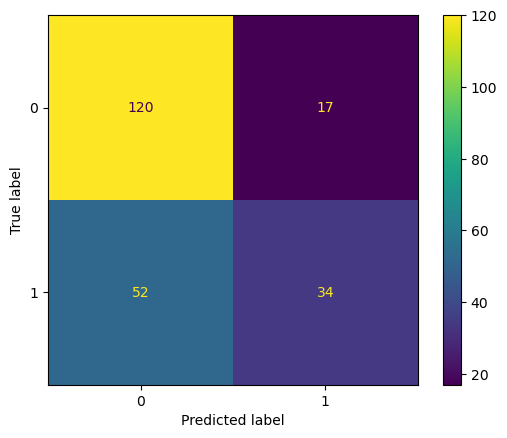

In [107]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 

#Matriz de confusion

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()